In [2]:
import numpy as np

import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

import os

In [6]:
def plot_gpfile(coordinates):
    
    """ Plots a Guide Point File """
    
    len_colors = len(np.unique(np.array(coordinates)[:,3]))
    new_map = plt.cm.get_cmap('hsv', len_colors)

    map = set(np.array(coordinates)[:,3])
    map_dict = {'AORTA_VALVE': 'r',
     'MITRAL_VALVE': 'b',
     'RV_INSERT': 'g',
     'APEX_POINT': 'y',
     'SAX_RV_FREEWALL': '#F2CA19',
     'LAX_LV_EPICARDIAL': '#0057E9',
     'TRICUSPID_VALVE': 'k',
     'LAX_RV_SEPTUM': '#E11845',
     'SAX_RV_SEPTUM': '#E11845',
     'LAX_RV_EPICARDIAL': '#0057E9',
     'LAX_RV_FREEWALL': '#F2CA19',
     'PULMONARY_VALVE': 'purple',
     'SAX_LV_ENDOCARDIAL': '#87E911',
     'SAX_LV_EPICARDIAL': '#0057E9',
     'SAX_RV_EPICARDIAL': '#0057E9',
     'LAX_LV_ENDOCARDIAL': '#87E911'}
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')

    labels = []
    for p1 in coordinates:
        lab = p1[3]
        if 'LAX' in lab or 'SAX' in lab:
            s = 3
        else:
            s = 10

        if lab in labels:
            ax.scatter3D(p1[0], p1[1], p1[2], color=map_dict[lab], s=s)
        else:
            labels.append(lab)
            ax.scatter3D(p1[0], p1[1], p1[2], color=map_dict[lab], label=p1[3], s=s)
    plt.legend()
    plt.show(block=True)

CHD7552901


<IPython.core.display.Javascript object>


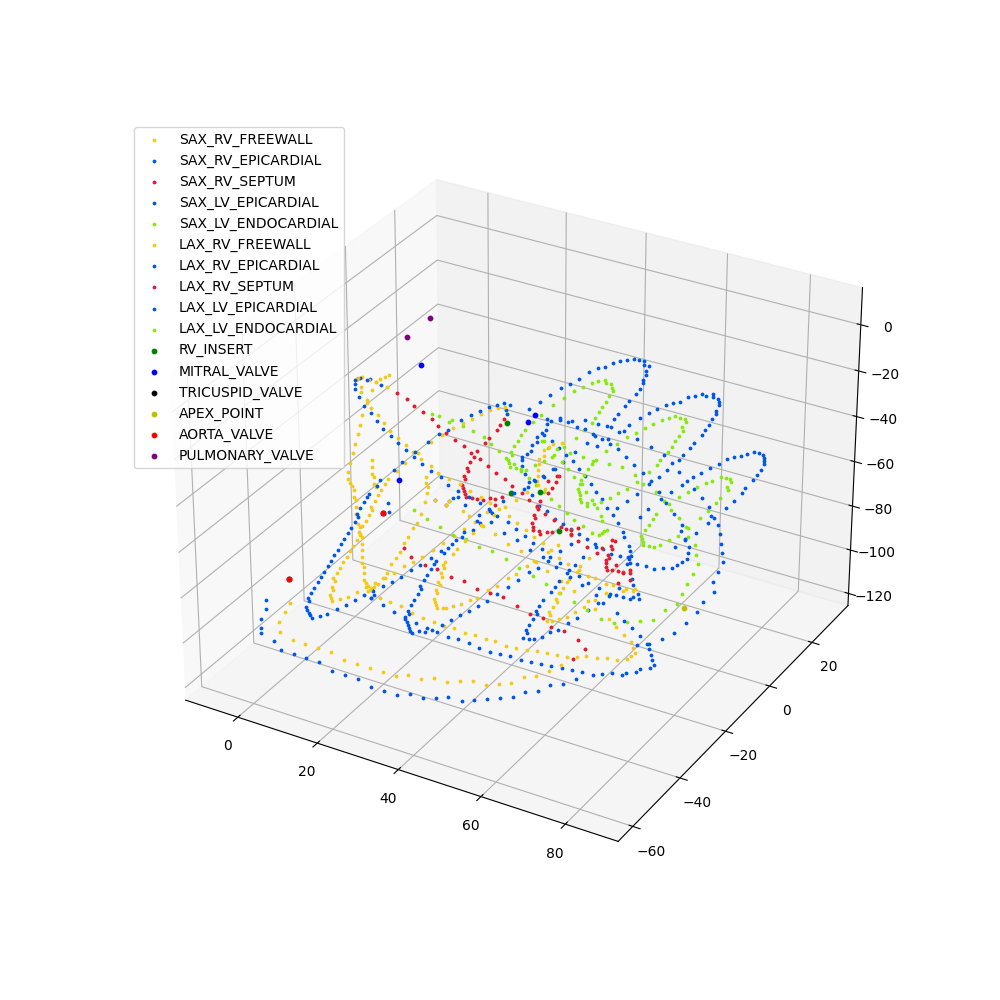

CHD1055301


<IPython.core.display.Javascript object>


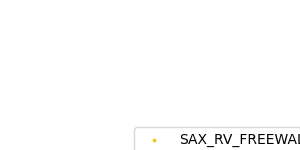

CHD5779804


<IPython.core.display.Javascript object>


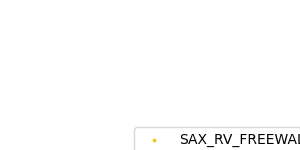

CHD7290401


<IPython.core.display.Javascript object>


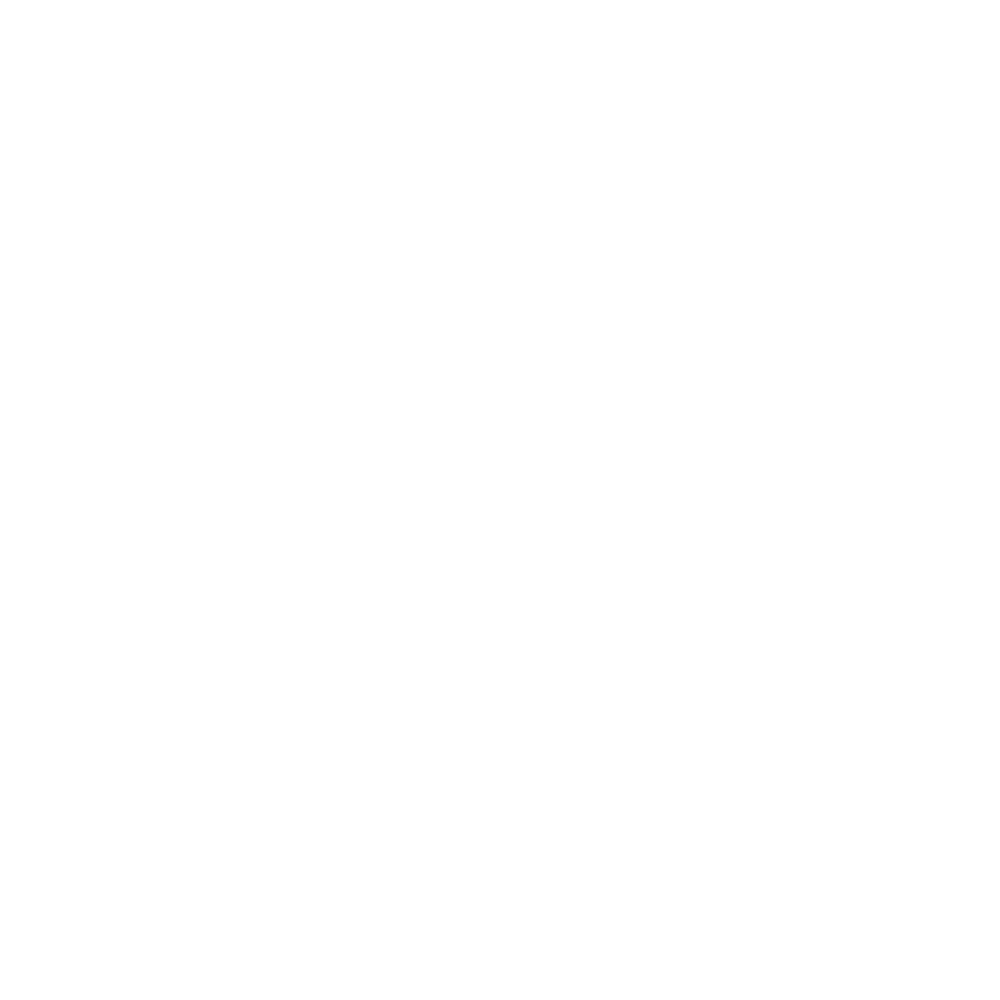

CHD8666802


<IPython.core.display.Javascript object>


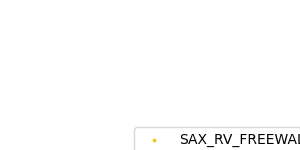

CHD4473303


<IPython.core.display.Javascript object>


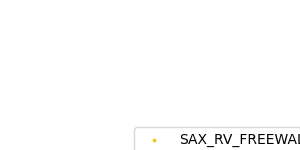

CHD4698202


<IPython.core.display.Javascript object>


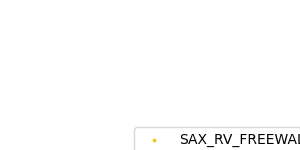

CHD1614905


<IPython.core.display.Javascript object>


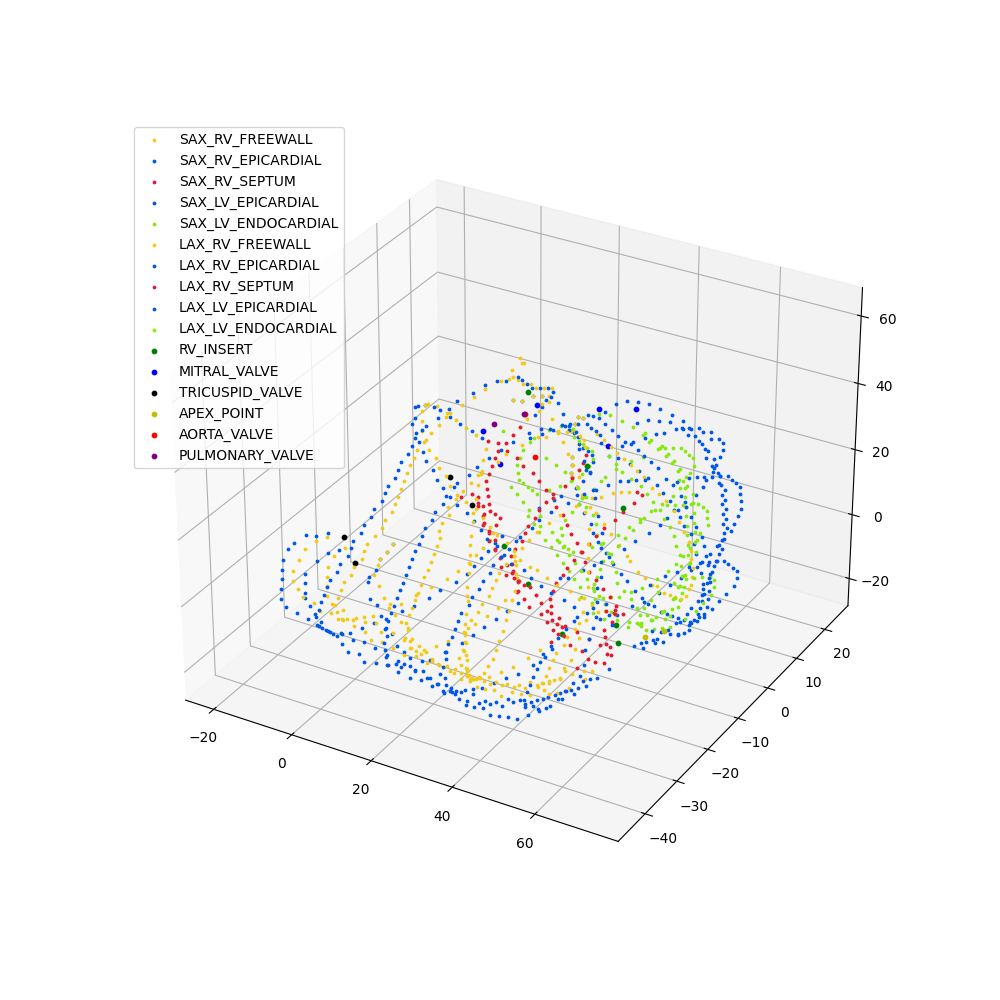

CHD9925301


<IPython.core.display.Javascript object>


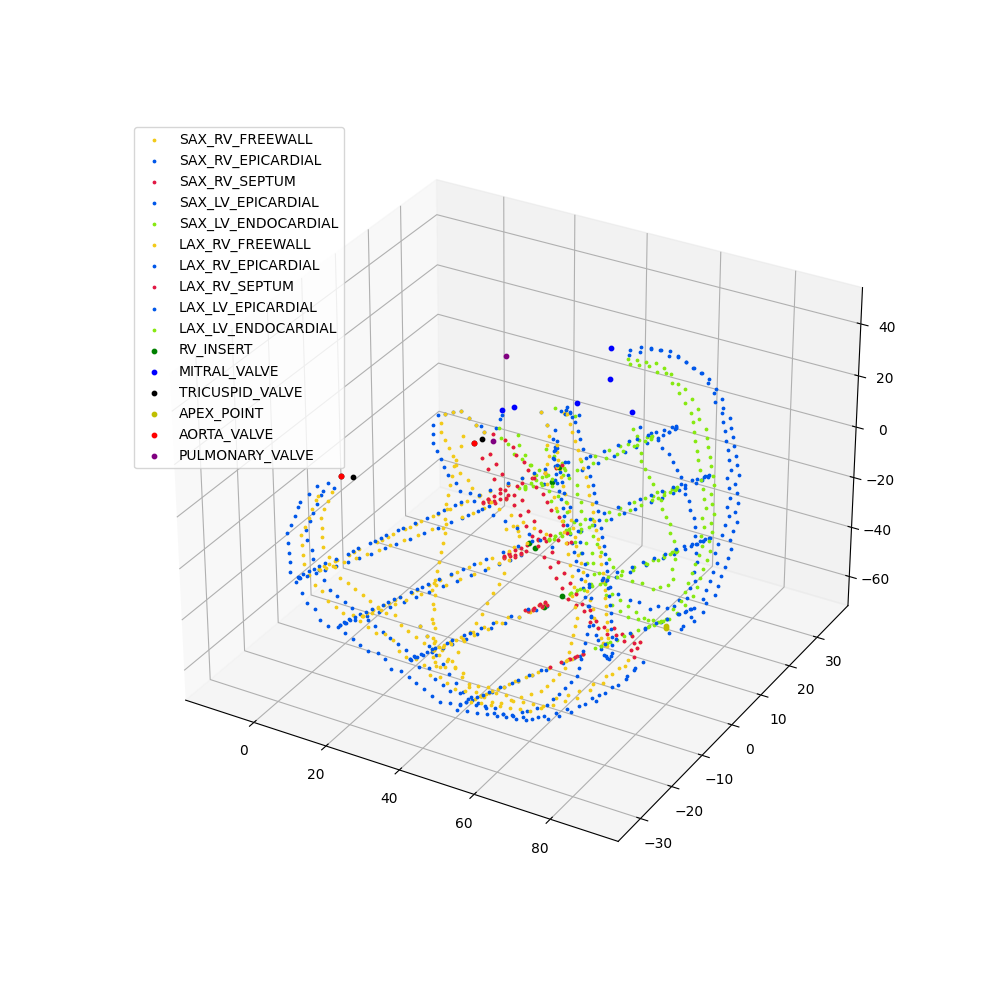

CHD9379602


<IPython.core.display.Javascript object>


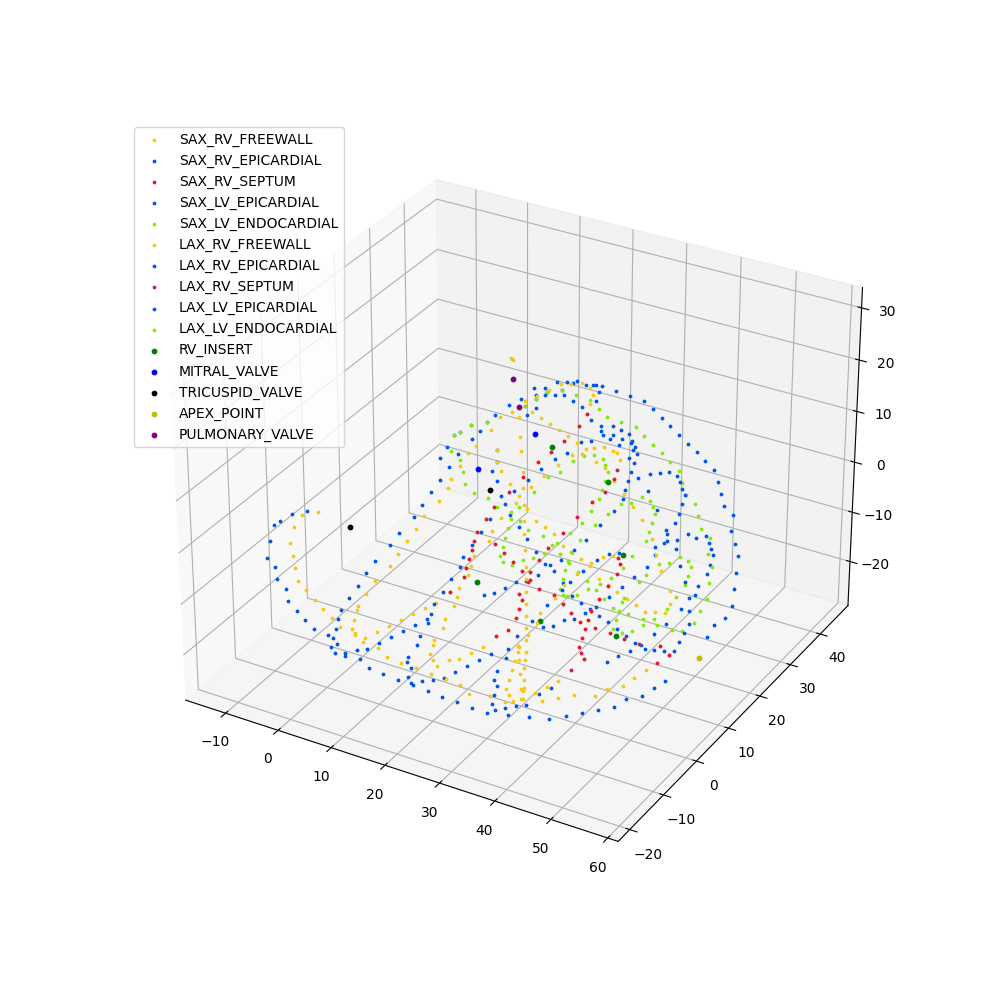

CHD7018802


<IPython.core.display.Javascript object>


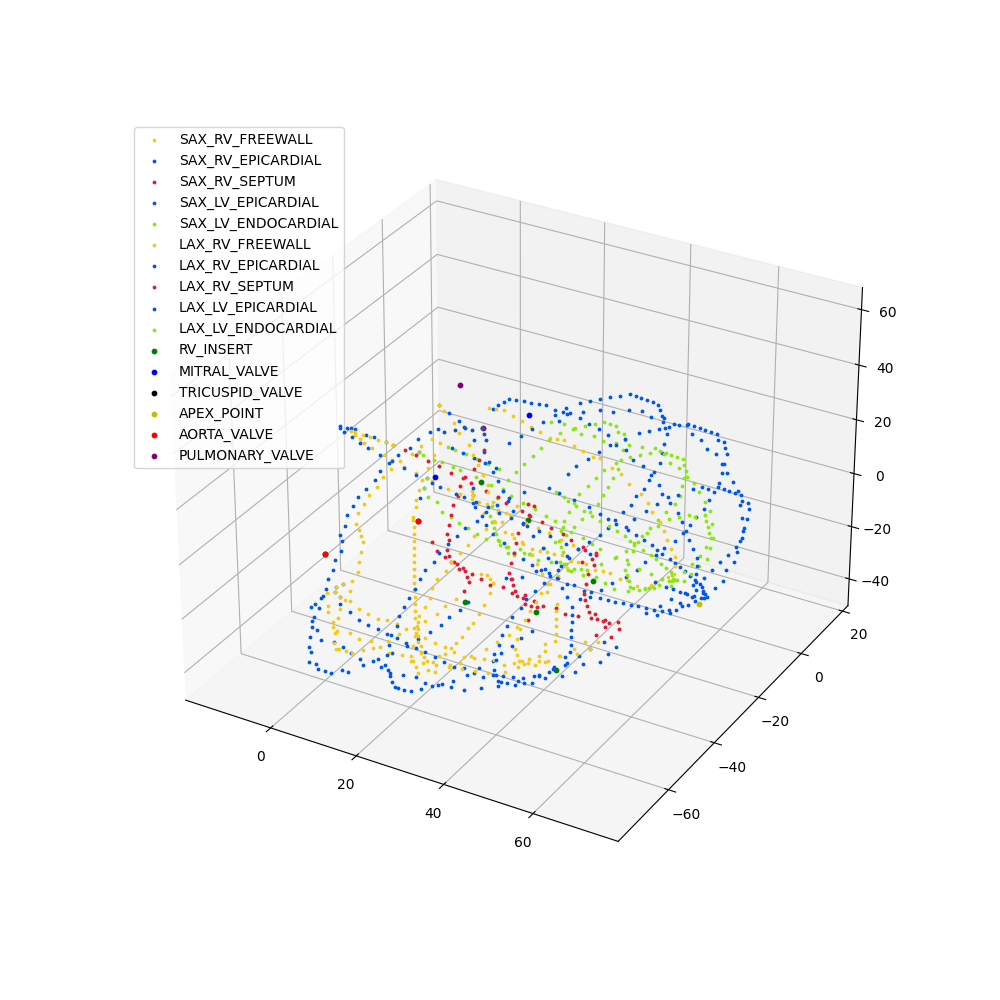

CHD3537601


<IPython.core.display.Javascript object>


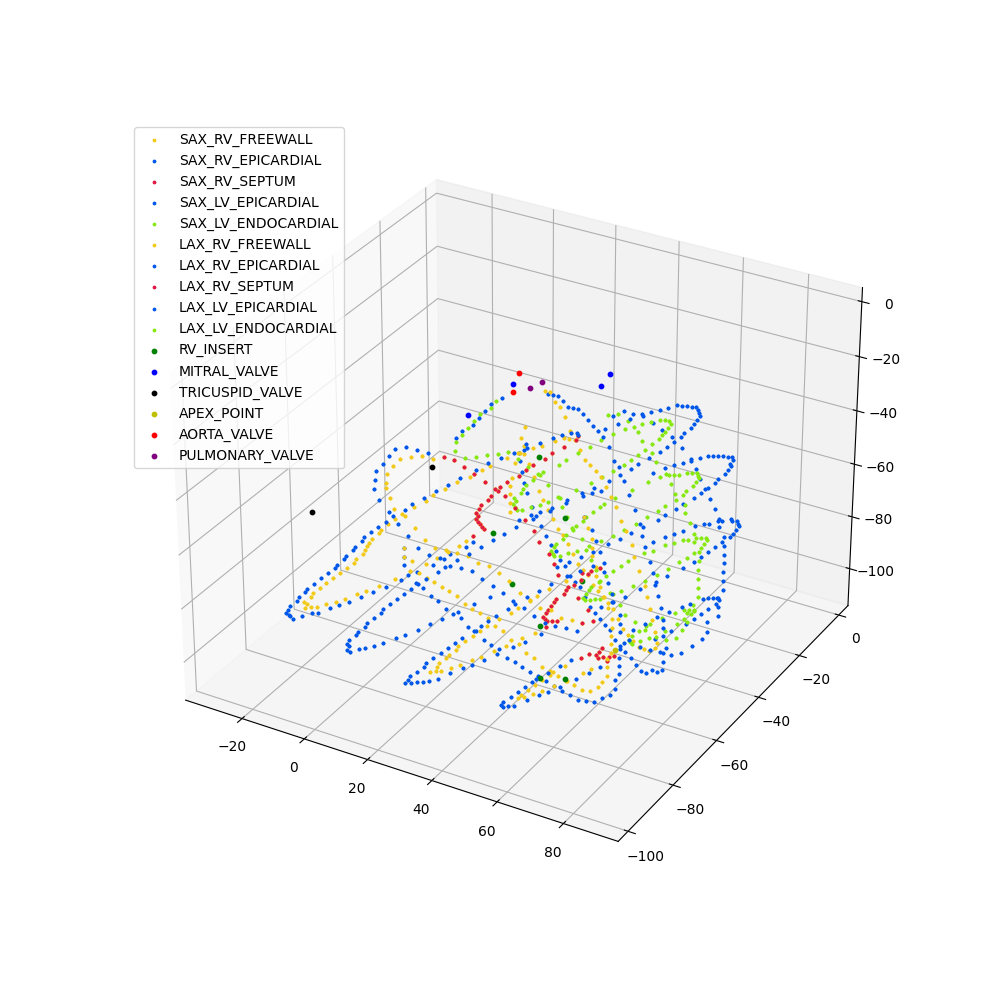

CHD5413103


<IPython.core.display.Javascript object>


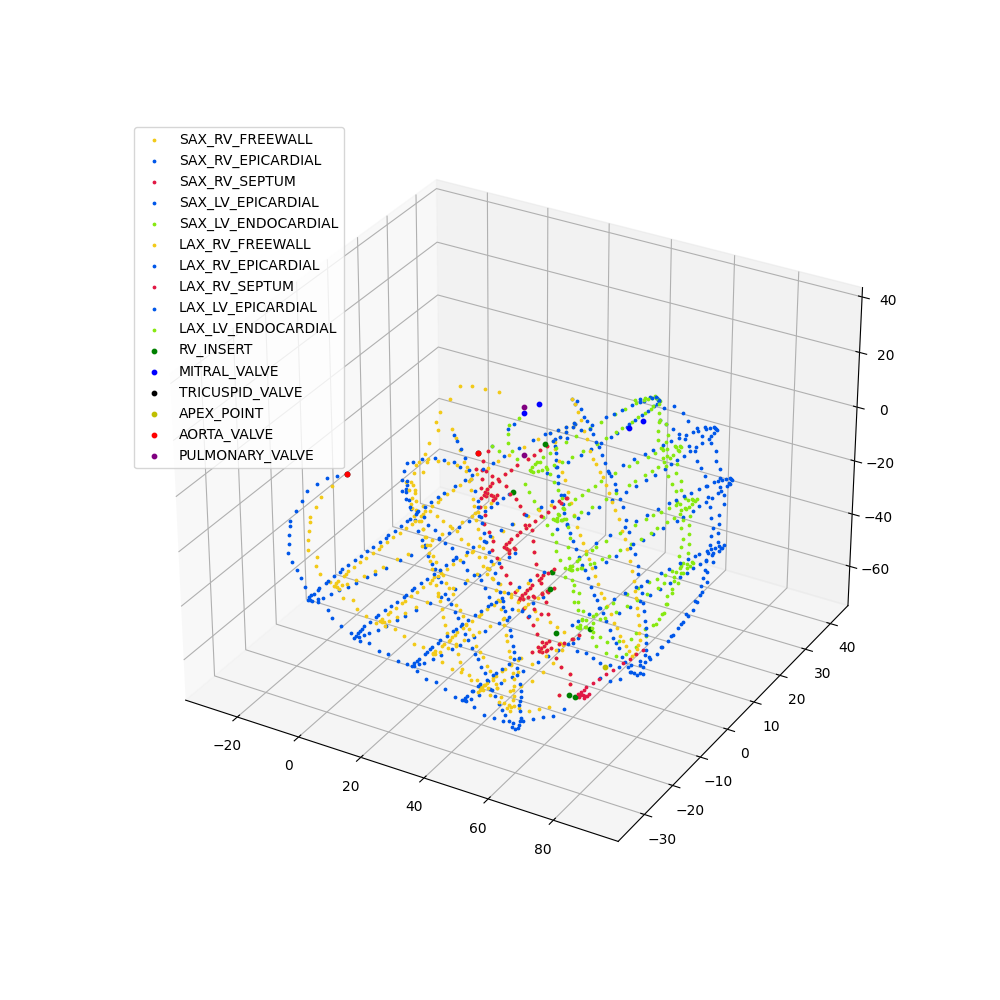

CHD6257105


<IPython.core.display.Javascript object>


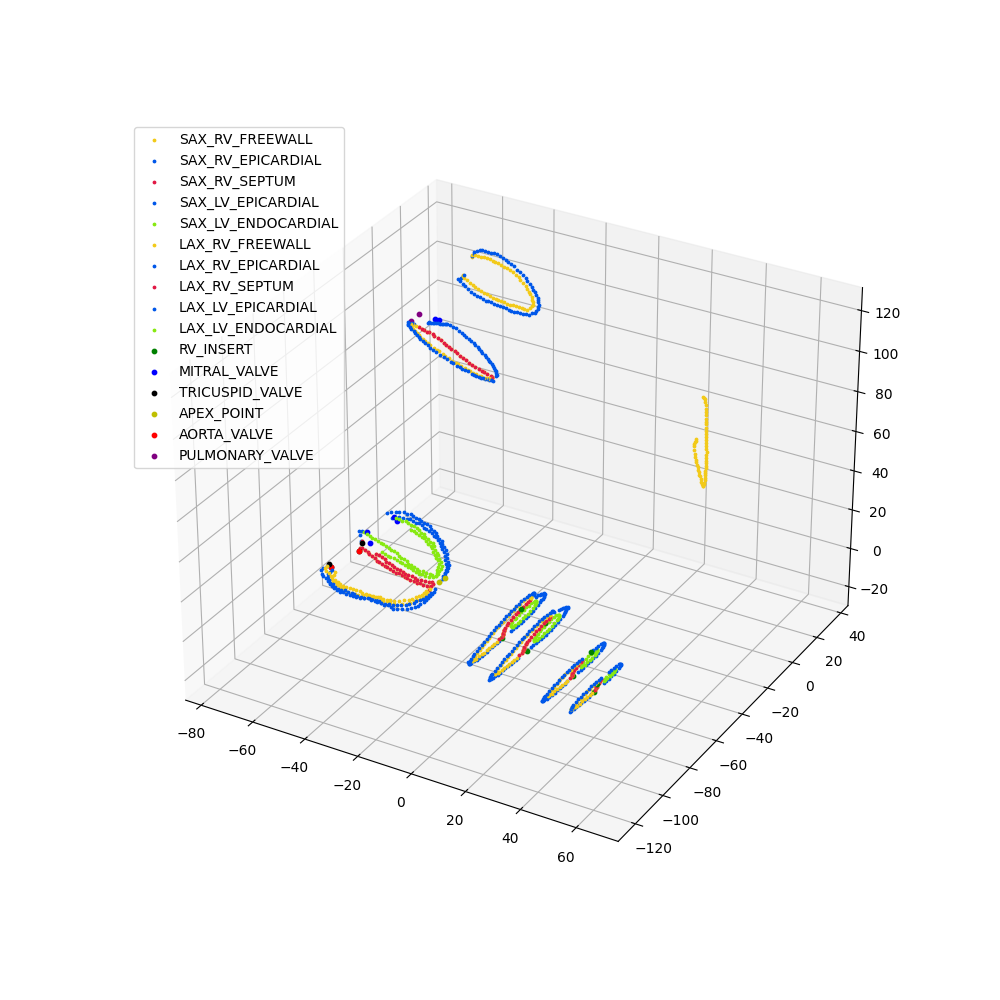

CHD2528602
No GP File for  CHD2528602


In [8]:
for patient in os.listdir('../data/processed/'):
    if 'CHD' in patient:
        print(patient)
        coordinates = []
        model_folder = '../data/processed/' + patient
        
        try:
            with open(model_folder + '/GP_ES.txt', 'r') as f:
                for i,line in enumerate(f.readlines()):
                    if i > 0:
                        points = line.split('\t')
                        coordinates.append([float(points[0]), float(points[1]), float(points[2]), points[3]])
                        
            plot_gpfile(coordinates)
            
        except:
            print('No GP File for ', patient)